In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from textblob import TextBlob
import re

In [2]:
data = pd.read_csv('C:/Users/Abhishek/Downloads/amazon_tweets.csv')

In [3]:
data.head()

,Unnamed: 0,amazon_tweets
0,0,𝗞𝗞𝗥 𝗙𝗶𝗹𝗺𝘀 𝗘𝗽. 𝟰: Coach McCullum says he’s the ...
1,1,"Initially unsold in '14, 𝙈𝙑𝙋 the next year. 💪🏼..."
2,2,#Mi11XPro: A Cut Above The Best!💪\n\n📱#Snapdra...
3,3,"Hey @amazonIN , I ordered a book from amazon, ..."
4,4,My amazon account has been blocked my @amazonI...


In [4]:
data.shape

(2914, 2)

In [6]:
data['amazon_tweets'][855]

'Fav feature - insane touch sampling rate!!!\n@IqooInd @amazonIN  #iQOO7Series https://t.co/d8PqN8306w'

In [7]:
# clean the text
def clean_text(text):
    clean_words=re.sub('http\s+','',text)
    clean_words=re.sub('#[\w]*','',clean_words)
    clean_words=re.sub('@[\w]*','',clean_words)
    clean_words=re.sub('[^a-zA-Z0-9]',' ',clean_words)
    return clean_words

In [8]:
data.head(10)

,Unnamed: 0,amazon_tweets
0,0,𝗞𝗞𝗥 𝗙𝗶𝗹𝗺𝘀 𝗘𝗽. 𝟰: Coach McCullum says he’s the ...
1,1,"Initially unsold in '14, 𝙈𝙑𝙋 the next year. 💪🏼..."
2,2,#Mi11XPro: A Cut Above The Best!💪\n\n📱#Snapdra...
3,3,"Hey @amazonIN , I ordered a book from amazon, ..."
4,4,My amazon account has been blocked my @amazonI...
5,5,DK HOME APPLIANCES Professional Series Finger ...
6,6,Can we involve e-com like @Flipkart @amazonIN ...
7,7,Team Amazon Besharmi ki had Kardi Apne 29 Apri...
8,8,Dear @amazonIN \n\nI'm not able to login to my...
9,9,Theme of the month for @PrimeVideoIN subscribe...


In [9]:
clean_text(data['amazon_tweets'][855])

'Fav feature   insane touch sampling rate        https   t co d8PqN8306w'

In [10]:
clean_data = data.iloc[:,1].apply(clean_text)

In [11]:
clean_data.head(15)

0                      Coach McCullum says he s the ...
1     Initially unsold in  14      the next year    ...
2       A Cut Above The Best            A    bright ...
3     Hey    I ordered a book from amazon  returned ...
4     My amazon account has been blocked my  without...
5     DK HOME APPLIANCES Professional Series Finger ...
6     Can we involve e com like     etc to list veri...
7     Team Amazon Besharmi ki had Kardi Apne 29 Apri...
8     Dear    I m not able to login to my account  A...
9     Theme of the month for  subscribers is here  D...
10    Very bad experience get from   I think   will ...
11    Stop  Look  Go  PARENTING  THE CHANGING NORMS ...
12    This month I thought to purchase grocery stuff...
13    I prefer  over  when it comes to buying books ...
14           GOT SERIOUS power  https   t co jPTaSkdZ8p
Name: amazon_tweets, dtype: object

In [12]:
clean_data.tail(15)

2899    Please help me with my order as it is delibera...
2900    S J D       Thanks Amazon for Contest        h...
2901    Amazon Fire Cube Launched in India   Specifica...
2902    Look at this image  Apparently 3yo kids have a...
2903    I played this interesting Quiz on Amazon Play ...
2904    Best Sellers in Office Products on   BUY   htt...
2905           Where is Northeast part of India       ...
2906     Thanks for this quiz     https   t co 0t6DpZO7qU
2907     Thanks for this quiz     https   t co ZGHu5mCC6I
2908    Ofcourse another beast from iqoo the iqoo 7 co...
2909    I got all the answers correct        https   t...
2910    Ofcourse it would be the beast Snapdragon 888 ...
2911    I played this interesting Quiz on Amazon https...
2912    The power that is  will now be delivered at yo...
2913    While searching online after no availability i...
Name: amazon_tweets, dtype: object

In [13]:
clean_data[55]

'It s my favt feature  And I liked that this secured by Knox          https   t co QjHmVqbIKC'

In [14]:
clean_data = pd.DataFrame(clean_data)

In [15]:
clean_data.head(10)

,amazon_tweets
0,Coach McCullum says he s the ...
1,Initially unsold in 14 the next year ...
2,A Cut Above The Best A bright ...
3,Hey I ordered a book from amazon returned ...
4,My amazon account has been blocked my without...
5,DK HOME APPLIANCES Professional Series Finger ...
6,Can we involve e com like etc to list veri...
7,Team Amazon Besharmi ki had Kardi Apne 29 Apri...
8,Dear I m not able to login to my account A...
9,Theme of the month for subscribers is here D...


In [16]:
# Get the subjectivity and polarity

In [17]:
def get_sub(text):
    return TextBlob(text).sentiment.subjectivity

def get_pol(text):
    return TextBlob(text).sentiment.polarity

In [18]:
clean_data['Subjectivity'] = clean_data.iloc[:,0].apply(get_sub)
clean_data['Polarity'] = clean_data.iloc[:,0].apply(get_pol)

In [19]:
clean_data.head(10)

,amazon_tweets,Subjectivity,Polarity
0,Coach McCullum says he s the ...,0.000000,0.000000
1,Initially unsold in 14 the next year ...,0.333333,0.166667
2,A Cut Above The Best A bright ...,0.400000,0.566667
3,Hey I ordered a book from amazon returned ...,0.000000,0.000000
4,My amazon account has been blocked my without...,0.000000,0.000000
5,DK HOME APPLIANCES Professional Series Finger ...,0.100000,0.100000
6,Can we involve e com like etc to list veri...,0.000000,0.000000
7,Team Amazon Besharmi ki had Kardi Apne 29 Apri...,0.000000,0.000000
8,Dear I m not able to login to my account A...,0.625000,-0.250000
9,Theme of the month for subscribers is here D...,0.000000,0.000000


In [20]:
clean_data[clean_data['Polarity']>0.2]

,amazon_tweets,Subjectivity,Polarity
2,A Cut Above The Best A bright ...,0.400000,0.566667
13,I prefer over when it comes to buying books ...,0.500000,0.500000
16,My Favourite Feature is Super Amoled Display ...,0.666667,0.333333
18,Some thing is happening though too little to...,0.520000,0.202500
20,I played this interesting Quiz on Amazon Pl...,0.500000,0.500000
...,...,...,...
2897,I have just participated in this amazing cont...,0.900000,0.600000
2903,I played this interesting Quiz on Amazon Play ...,0.500000,0.500000
2904,Best Sellers in Office Products on BUY htt...,0.300000,1.000000
2908,Ofcourse another beast from iqoo the iqoo 7 co...,0.900000,0.500000


In [21]:
clean_data[clean_data['Polarity']<-0.2]

,amazon_tweets,Subjectivity,Polarity
8,Dear I m not able to login to my account A...,0.625000,-0.250000
14,GOT SERIOUS power https t co jPTaSkdZ8p,0.666667,-0.333333
19,Are you guys serious Sent not for sale item ...,0.666667,-0.333333
43,Item missing in the package complaint filed a...,0.125000,-0.250000
65,When can we expect in India it sucks that i...,0.300000,-0.300000
...,...,...,...
2857,Shame on you and extorting money during this...,0.833333,-0.388889
2860,Amazon ne mere sath cheat kiya he mere 2 mont...,0.500000,-0.500000
2875,Twisted Tales From The Universe Star Lady Tal...,1.000000,-0.500000
2891,Such a pathetic service on Refunds You ve lit...,0.600000,-0.333333


In [22]:
clean_data[clean_data['Subjectivity']>0.5]

,amazon_tweets,Subjectivity,Polarity
8,Dear I m not able to login to my account A...,0.625000,-0.250000
10,Very bad experience get from I think will ...,0.583333,0.045000
14,GOT SERIOUS power https t co jPTaSkdZ8p,0.666667,-0.333333
16,My Favourite Feature is Super Amoled Display ...,0.666667,0.333333
18,Some thing is happening though too little to...,0.520000,0.202500
...,...,...,...
2891,Such a pathetic service on Refunds You ve lit...,0.600000,-0.333333
2896,It is a latest device of IQOO7 5G SERIES with ...,0.766667,0.566667
2897,I have just participated in this amazing cont...,0.900000,0.600000
2899,Please help me with my order as it is delibera...,0.750000,-0.500000


In [23]:
def sentiment(polarity):
    if polarity>0.2:
        return 'Positive'
    elif polarity<-0.2:
        return 'Negative'
    else:
        return 'Neutral'

In [24]:
clean_data['Sentiment'] = clean_data['Polarity'].apply(sentiment)

In [25]:
clean_data.head(20)

,amazon_tweets,Subjectivity,Polarity,Sentiment
0,Coach McCullum says he s the ...,0.000000,0.000000,Neutral
1,Initially unsold in 14 the next year ...,0.333333,0.166667,Neutral
2,A Cut Above The Best A bright ...,0.400000,0.566667,Positive
3,Hey I ordered a book from amazon returned ...,0.000000,0.000000,Neutral
4,My amazon account has been blocked my without...,0.000000,0.000000,Neutral
5,DK HOME APPLIANCES Professional Series Finger ...,0.100000,0.100000,Neutral
6,Can we involve e com like etc to list veri...,0.000000,0.000000,Neutral
7,Team Amazon Besharmi ki had Kardi Apne 29 Apri...,0.000000,0.000000,Neutral
8,Dear I m not able to login to my account A...,0.625000,-0.250000,Negative
9,Theme of the month for subscribers is here D...,0.000000,0.000000,Neutral


In [26]:
clean_data[clean_data['Sentiment']=='Negative']['amazon_tweets']

8       Dear    I m not able to login to my account  A...
14             GOT SERIOUS power  https   t co jPTaSkdZ8p
19      Are you guys serious   Sent not for sale item ...
43      Item missing in the package  complaint filed a...
65      When can we expect  in India   it sucks that i...
                              ...                        
2857    Shame on you  and  extorting money during this...
2860     Amazon ne mere sath cheat kiya he mere 2 mont...
2875    Twisted Tales From The Universe  Star Lady Tal...
2891    Such a pathetic service on Refunds  You ve lit...
2899    Please help me with my order as it is delibera...
Name: amazon_tweets, Length: 149, dtype: object

In [27]:
clean_data.iloc[80,0]

'Hi  you can call yourself the biggest e commerce website in the world  but even after browsing for hours  I can t find what i need '

In [28]:
clean_data['Sentiment'].value_counts()

Neutral     1486
Positive    1279
Negative     149
Name: Sentiment, dtype: int64

In [29]:
text_list = list(clean_data[clean_data['Sentiment']=='Negative']['amazon_tweets'])
text = " ".join(text_list)

In [30]:
text

'Dear    I m not able to login to my account  Also I m not getting any OTP on my mobile number  When I logi  https   t co h20ULA0fGn      GOT SERIOUS power  https   t co jPTaSkdZ8p Are you guys serious   Sent not for sale item and it is already used by someone else    Send tester product and don  https   t co 94hJBQqQ8p Item missing in the package  complaint filed against         https   t co OLYwebxXSq When can we expect  in India   it sucks that it s a region restricted service      kuch karo yaar  Brutal by Uday Satpathy     https   t co Gropcp1UYQ     Don t order in Amazon fake delivery service fake customer service worst service   AmazonIn How Amazon is messing with consumer rights hiding behind its policies   Once you added money in amazon pay wallet   https   t co sVRoGFKpuD Very sorry to say that today I have lost my trust on Amazon as I have ordered one mobile and the way ur delivery pe  https   t co 5YUX9ogyj6 Dear   You ve sent me the wrong product and your call center is un

In [31]:
lis = ['s','t','rt','hi','hello','amazon','thanks','please']
text_n = ''
for i in text.split():
    if i.lower() not in lis:
        text_n = text_n+' '+i.lower()

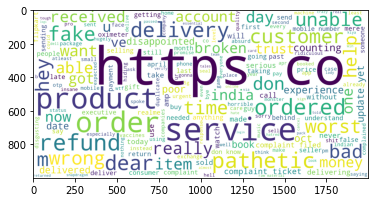

In [32]:
import matplotlib.pyplot as plt
wc = WordCloud(width=2000, height=1000, background_color='white').generate(text_n)
plt.imshow(wc)
plt.show()

In [33]:
text_list = list(clean_data[clean_data['Sentiment']=='Positive']['amazon_tweets'])
text = " ".join(text_list)

In [34]:
text

'  A Cut Above The Best            A    bright   c  https   t co mlnQy5cDtK I prefer  over  when it comes to buying books  The quality of books delivered by Amazon is mostly  https   t co j4cNfOp8Xe My Favourite Feature is Super Amoled Display         https   t co X08HHkJDLw Some thing is happening  though too little  too late  Many many more corporations will have to come together and DO  https   t co V6YovNF6tL    I played this interesting Quiz on Amazon Play games at Amazon FunZone  https   t co wNcURCU3tw Giving keeps you very light  there is no baggage and it gives you the wings to fly  So be a giver not a taker    https   t co me6IMNvzK7 Be it a backyard movie night or midnight storytelling at home  this portable and easy to use   2 makes i  https   t co iajGdqwYYA I played this interesting quiz on Amazon and try your luck     https   t co DjpD3hAcul Proud to be a part of  Working here from 1 year many thinhs to learn can be a good leader and has better a  https   t co E19hP0Io0y

In [35]:
lis = ['s','t','rt','hi','hello','amazon','thanks','please']
text_n = ''
for i in text.split():
    if i.lower() not in lis:
        text_n = text_n+' '+i.lower()

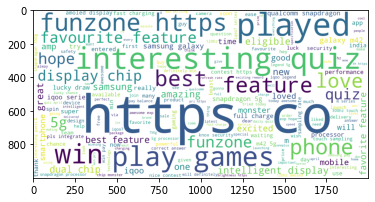

In [36]:
wc = WordCloud(width=2000, height=1000, background_color='white').generate(text_n)
plt.imshow(wc)
plt.show()